In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Підключіть необхідні бібліотеки.

In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.set(rc={'figure.figsize':(10, 8)}); # you can change this if needed

## Data loading

Завантажте дані. Вони знаходяться в директорії input.

In [3]:
df = pd.read_csv('adult.csv')

## Data understanding

* Виведіть загальну інформацію про набір даних. Яку кількість змінних він містить? Який тип змінних? Чи багато пропущених значень?
* Виведіть описову статистику по числовим змінним. Зробіть візуалізацію розподілів найцікавіших із них. Що можна сказати про наявність помилкових значень? Чи багато нетипових значень?
* Виведіть описову статистику по категоріальним змінним. Зробіть візуалізацію розподілів найцікавіших із них.

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

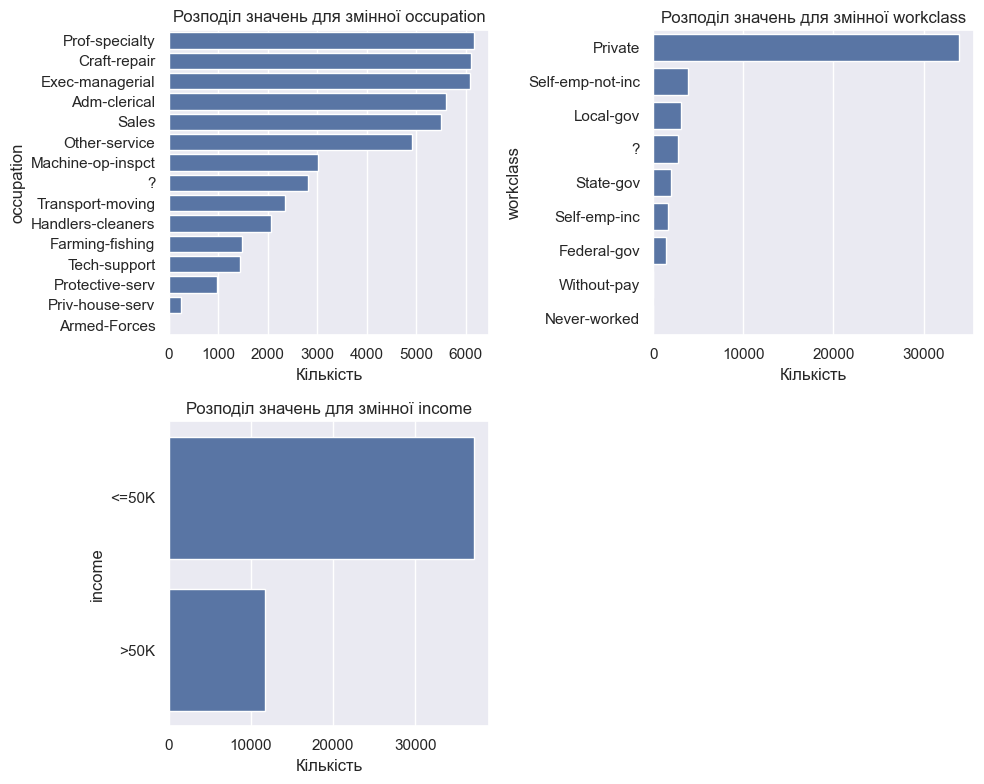

######### Візуалізація для числових змінних


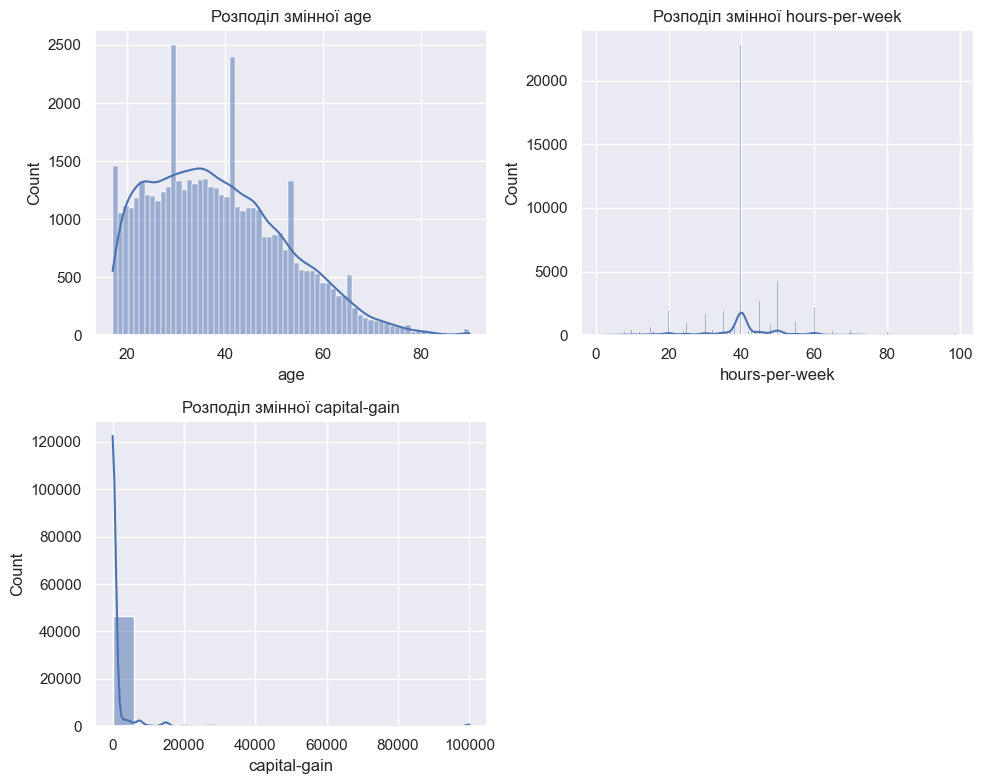

In [5]:
print(df.head())
print(df.info())

#### Схоже що income будет нашою target змінною, та це задача регресії 

missing_values = df.isnull().sum()
print(missing_values)


print("######### Описова статистика по числовим змінним")
print(df.describe())

print("######### Описова статистика по категорільним змінним")
print(df.describe(include=['object']))
print("######### Розподіл значень категоріальних змінних")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nРозподіл значень для {col}:")
    print(df[col].value_counts())

interesting_categorical_columns = ['occupation', 'workclass', 'income']  
for i, col in enumerate(interesting_categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Розподіл значень для змінної {col}')
    plt.xlabel('Кількість')

plt.tight_layout()
plt.show()

print("######### Візуалізація для числових змінних")
interesting_columns = ['age', 'hours-per-week', 'capital-gain']  

for i, col in enumerate(interesting_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Розподіл змінної {col}')

plt.tight_layout()
plt.show()


## Data cleaning & Analyzing relationships

У подальших етапах за необхідності видаляйте (або заповнюйте певним чином) пропущені значення та/або викиди (outliers). Цей крок не є обов'язковим, проте слід пам'ятати, що деякі коефіцієнти кореляції та моделі чутливі до наявності нетипових значень у даних.

Візуалізуйте розподіл значень віку для осіб, які заробляють > 50K та < 50K. Знайдіть середнє та стандартне відхилення віку у кожній із груп.

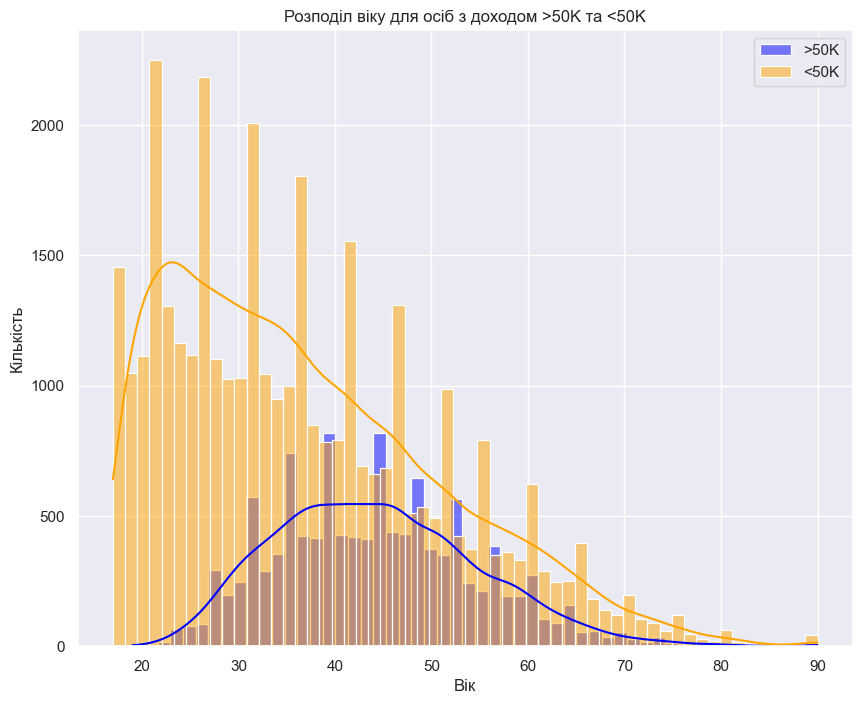

Стандартне відхилення віку для >50k=10.55898337028787, <=50k=14.104118026101544, Середнє значення для >50k=44.275177547702576, <=50k=36.87218409366169


In [6]:
sns.histplot(df[df['income'] == '>50K']['age'], kde=True, color='blue', label='>50K')
sns.histplot(df[df['income'] == '<=50K']['age'], kde=True, color='orange', label='<50K')
plt.title('Розподіл віку для осіб з доходом >50K та <50K')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.legend()
plt.show()

mean_age_lower_50k=df[df['income'] == '<=50K']['age'].mean()
mean_age_higher_50k=df[df['income'] == '>50K']['age'].mean()

std_age_lower_50k=df[df['income'] == '<=50K']['age'].std()
std_age_higher_50k=df[df['income'] == '>50K']['age'].std()
print(f'Стандартне відхилення віку для >50k={std_age_higher_50k}, <=50k={std_age_lower_50k}, Середнє значення для >50k={mean_age_higher_50k}, <=50k={mean_age_lower_50k}')



Чи вірно, що люди, які заробляють > 50K, мають як мінімум повну середню освіту (значення **education** --- Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters або Doctorate)?

In [7]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
higher_pay = df[df['income'] == '>50K']
higher_pay_higher_education = higher_pay['education'].isin(higher_education)
percentage_with_higher_education = higher_pay_higher_education.mean() * 100
print(f'Процент людей що заробляють більше 50к із як мінімум повною середньою освітою ={percentage_with_higher_education}')



Процент людей що заробляють більше 50к із як мінімум повною середньою освітою =57.79926413964234


Які чоловіки заробляють в середньому більше --- одружені чи неодружені?

In [13]:
df_men = df[df['gender'] == 'Male']

married_men = df_men[df_men['marital-status'].isin(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'])]['income']
non_married_men = df_men[df_men['marital-status'].isin(['Never-married', 'Divorced', 'Separated', 'Widowed'])]['income']
married_men_income_avg = married_men.map(lambda x: '>50K' in x).mean()
non_married_men_income_avg = non_married_men.map(lambda x: '>50K' in x).mean()
print(f'Married = {married_men_income_avg*100}, non-married = {non_married_men_income_avg*100}')

Married = 44.067210279219175, non-married = 8.06282722513089


Яка максимальна кількість робочих годин на тиждень? Скільки людей працюють таку кількість часу та який серед них відсоток тих, хто заробляє багато?

In [25]:
print(f"Максимальна кількість робочих годин :{df['hours-per-week'].max()}")
max_hpw_amount = df[df['hours-per-week'] == 99]
print(f'Кількість людей що працюють 99 годин на тиждень :{max_hpw_amount.shape[0]}')
percentage_high_income = max_hpw_amount['income'].map(lambda x: '>50K' in x).mean() * 100
print(percentage_high_income)

Максимальна кількість робочих годин :99
Кількість людей що працюють 99 годин на тиждень :137
29.927007299270077


Що можна сказати про кореляцію між кількістю робочих годин та зарплатою? Чи є вона статистично значущою?

In [50]:
df['income_numeric'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

correlation = df['hours-per-week'].corr(df['income_numeric'])
print(correlation)

0.22768676056081072


Це слабкий позитивний зв'язок, що означає, що з більшою кількістю робочих годин дещо зростає ймовірність мати дохід понад 50 тисяч доларів на рік. Однак ця кореляція є далеко не сильною, тому кількість робочих годин не є основним фактором, що визначає дохід.

C:\Users\rex20\AppData\Local\Temp\ipykernel_4620\2054510937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_hours.index, y=education_hours.values, palette="coolwarm")


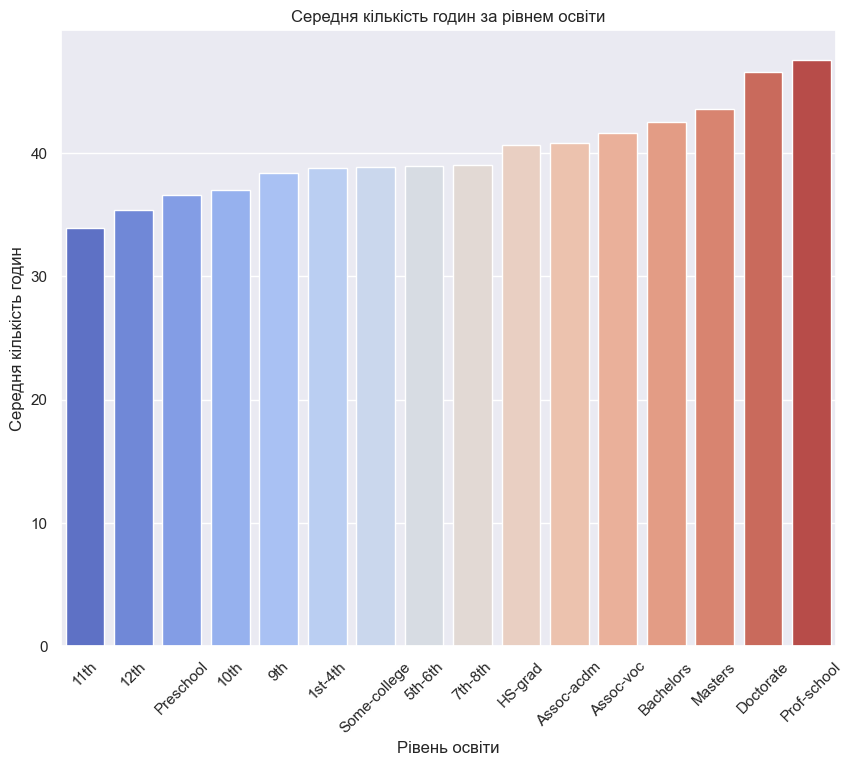

In [44]:
education_hours = df.groupby('education')['hours-per-week'].mean().sort_values()

sns.barplot(x=education_hours.index, y=education_hours.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Середня кількість годин за рівнем освіти')
plt.xlabel('Рівень освіти')
plt.ylabel('Середня кількість годин')
plt.show()

Візуалізуйте розподіл заробітків (групи > 50K та < 50K) по країнах. Який висновок можна зробити?

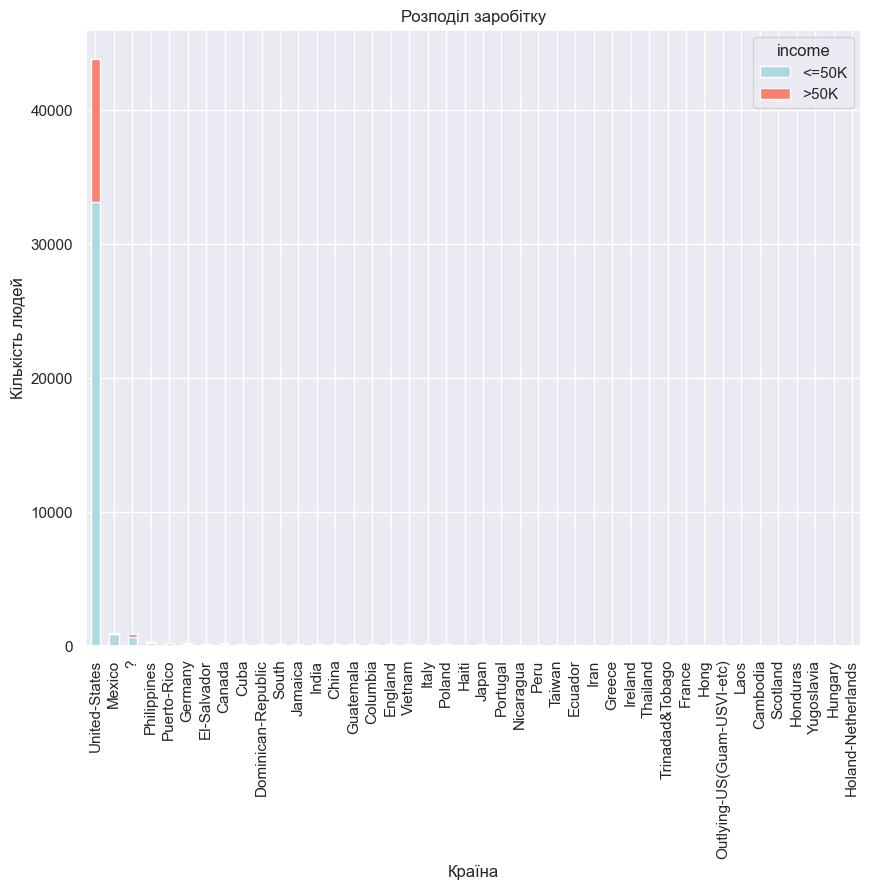

In [43]:
country_income_distribution = df.groupby(['native-country', 'income']).size().unstack()
country_income_distribution = country_income_distribution.fillna(0)
country_income_distribution = country_income_distribution[(country_income_distribution['<=50K'] > 0) | (country_income_distribution['>50K'] > 0)]
country_income_distribution = country_income_distribution.sort_values(by=['<=50K', '>50K'], ascending=False)
country_income_distribution.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Розподіл заробітку')
plt.xlabel('Країна')
plt.ylabel('Кількість людей')
plt.xticks(rotation=90)
plt.show()

Які ще інсайти можна знайти в наявних даних? Творче завдання.

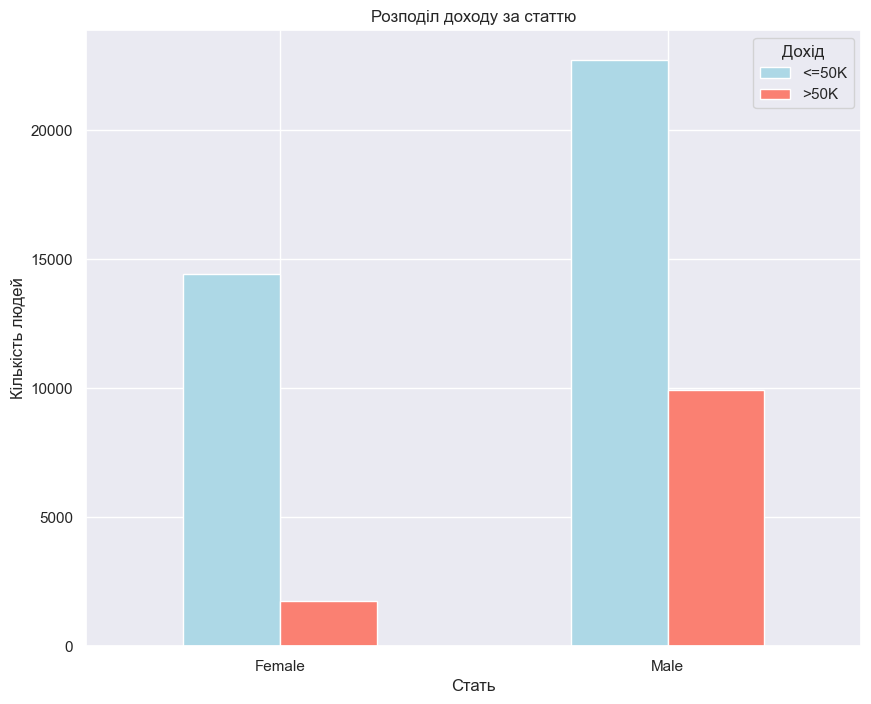

In [46]:
gender_income_distribution = df.groupby(['gender', 'income']).size().unstack()

gender_income_distribution.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Розподіл доходу за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість людей')
plt.xticks(rotation=0)
plt.legend(title='Дохід', labels=['<=50K', '>50K'])
plt.show()


Творчє завдання

In [55]:
data_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'], drop_first=True)
correlation_matrix = data_encoded.corr()
income_correlation = correlation_matrix['income_numeric'].sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print(income_correlation)

income_>50K                                  1.000000
income_numeric                               1.000000
marital-status_Married-civ-spouse            0.445853
educational-num                              0.332613
age                                          0.230369
hours-per-week                               0.227687
capital-gain                                 0.223013
gender_Male                                  0.214628
occupation_Exec-managerial                   0.210938
occupation_Prof-specialty                    0.188793
education_Bachelors                          0.180371
education_Masters                            0.174184
education_Prof-school                        0.154627
capital-loss                                 0.147554
workclass_Self-emp-inc                       0.139596
education_Doctorate                          0.126473
relationship_Wife                            0.120484
race_White                                   0.083710
workclass_Federal-gov       